##Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/!МГТУ им. Баумана/kaggle/spaceship titanic/train.csv'

https://www.kaggle.com/competitions/spaceship-titanic/data

##import

In [ ]:
#общий
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image #для отображения картинок
from google.colab import drive

#ML
from sklearn.neighbors import KNeighborsClassifier #метод ближайших соседей
from sklearn.model_selection import train_test_split #разделение выборки на обучающую и тестовую
from sklearn.model_selection import GridSearchCV #подбор гиперпараметров методом сетки
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB #байесовские классификаторы
from sklearn.tree import DecisionTreeClassifier, export_graphviz #решающее дерево
from sklearn.svm import SVC #метод опорных векторов
from sklearn.linear_model import LogisticRegression #логистическая регрессия
from sklearn.ensemble import RandomForestClassifier #классификатор случайный лес
from sklearn.ensemble import GradientBoostingClassifier #бустинговый классификатор
from xgboost.sklearn import XGBClassifier
import joblib

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix #метрики классификации

#создание синтетических объектов (балансировка)
from imblearn.over_sampling import SMOTE 

sns.set_style ('darkgrid')

%matplotlib inline

##Загружаем данные



In [ ]:
data = pd.read_csv(path, index_col = 0)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
data.shape

(8693, 13)

In [ ]:
data.size

113009

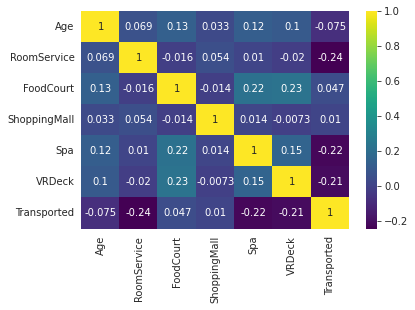

In [ ]:
sns.heatmap(data.corr(),cmap = 'viridis',annot =data.corr())

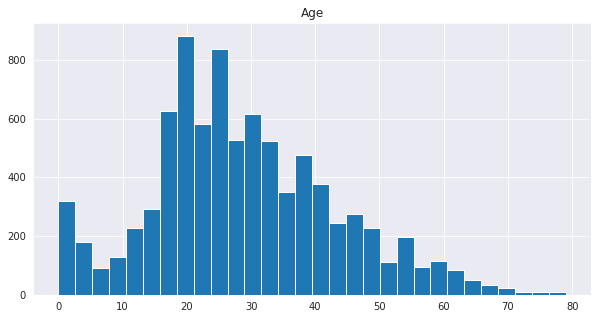

In [ ]:
data.hist(bins = 30, figsize=(10,5),column = 'Age')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [ ]:
data.shape

(8693, 13)

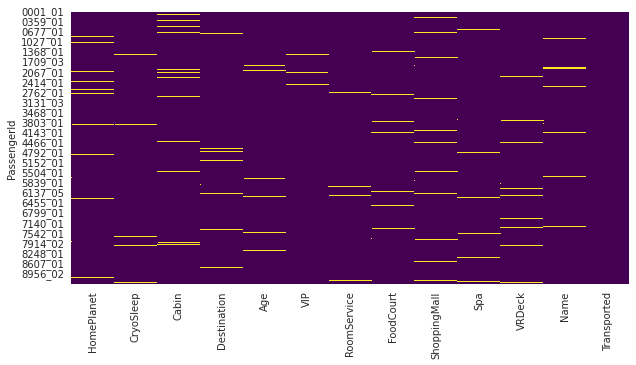

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data.isna(), cmap = 'viridis', cbar = False)
plt.show()

In [ ]:
#количество пропусков
data.isna().sum().sum()

2324

In [ ]:
data.isna().sum() / (data.notna().sum() + data.isna().sum()) * 100 #смотрим процент пропусков

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

##проверяю методы пандаса

In [ ]:
data[data.Transported==True].groupby(['Destination']).count()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,
55 Cancri e,1077,1073,1066,1076,1073,1081,1081,1073,1076,1075,1077,1098
PSO J318.5-22,391,393,396,394,390,390,393,392,392,397,393,401
TRAPPIST-1e,2717,2717,2725,2729,2721,2735,2716,2711,2728,2717,2718,2787


In [ ]:
data.groupby(['Transported']).agg({'VIP' : 'count',
                                   'Cabin' : 'count'
                                   }).reset_index()

,Transported,VIP,Cabin
0,False,4216,4216
1,True,4274,4278


In [ ]:
data['RoomService'].agg(['mean', 'sum'])

mean    2.246876e+02
sum     1.912541e+06
Name: RoomService, dtype: float64

In [ ]:
data.loc[:][['VIP','Transported']]

,VIP,Transported
PassengerId,,
0001_01,False,False
0002_01,False,True
0003_01,True,False
0003_02,False,False
0004_01,False,True
...,...,...
9276_01,True,False
9278_01,False,False
9279_01,False,True


In [ ]:
cols_to_show = ['VIP','Transported','HomePlanet','Destination','CryoSleep']

In [ ]:
pd.pivot_table(data.loc[:][cols_to_show],
               index = ['HomePlanet'], 
               columns = ['Transported'],
               aggfunc = np.count_nonzero)

CryoSleep      Destination         VIP     
Transported     False True       False  True False True
HomePlanet                                             
Earth             542  954        2651  1951    68   47
Europa             30  939         727  1404    81   92
Mars               82  630         839   920    69   37

In [ ]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


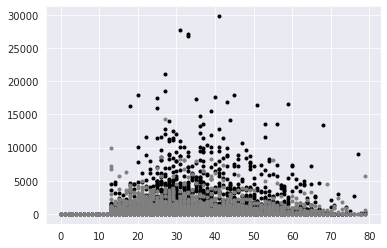

In [ ]:
plt.scatter(data['Age'],data['FoodCourt'], marker='.',color = 'black')
plt.scatter(data['Age'],data['RoomService'], marker='.',color = 'gray')

In [ ]:
#количество пропусков после заполнения данными
new_data.isna().sum().sum()

0

In [ ]:
new_data.shape

(8693, 11)

##Очистка данных

In [ ]:
def clean_data(df):
  new_data = df.drop('Name',axis = 1) #удалим колонку с именем
  new_data['Age'].fillna(new_data['Age'].mean(),inplace = True) #заполняем пропуски c возрастом средними значениями
  new_data['Age'].replace(0, new_data['Age'].mean(), inplace = True) #заполняем 0 средними значениями
  new_data['CryoSleep'].fillna(method='ffill',inplace = True) #заполняем пропуски методом ffill (forward)
  new_data['Destination'].fillna(method='ffill',inplace = True)
  new_data['VIP'].fillna(method='ffill',inplace = True)
  new_data['HomePlanet'].fillna(method='ffill',inplace = True)
  new_data['Cabin'].fillna(method='ffill',inplace = True)

  #список колонок пропуски в которых заполним нулями
  columns_for_fill = {'RoomService':0,
                      'FoodCourt':0,
                      'ShoppingMall':0,
                      'Spa':0,
                      'VRDeck':0}
  new_data.fillna(columns_for_fill,inplace = True) #заполняем пропуски 0
  #сделаем колонку с тратами и просуммируем в нее все траты
  new_data['Total costs'] = 0
  for i in columns_for_fill:
    new_data['Total costs'] = new_data['Total costs'] + new_data[i]
  new_data.drop(columns_for_fill,axis = 1, inplace = True) #удалим колонки с тратами
  costs_bins = new_data['Total costs'].quantile([0,0.5,0.75,0.85,0.9,0.95,0.96,0.98,0.99,1]) #делим траты на категории
  new_data['Group_costs'] = pd.cut(new_data['Total costs'], costs_bins,
                                   labels = ['1','2','3','4','5','6','7','8','9'],right = True, include_lowest=True) #присваиваем категорию
  new_data = new_data.drop('Total costs', axis = 1) #удаляем колонку с тратами
  new_data['Group_costs'] = new_data['Group_costs'].astype('float64')

  '''new_data.dropna(axis = 0,inplace = True) #удалим строки с пустыми данными
  drop_data_prc = (100 - (new_data.shape[0] / data.shape[0] * 100))
  print(f'Процент удаленных строк : {drop_data_prc}') #процент удаленных строк'''
  cabin_df = new_data['Cabin'].str.split('/', expand = True) #разобьем номер кабины по колонкам
  cabin_df.columns = ['Cabin_Letter', 'Cabin_No', 'Cabin_type'] #определим колонки для нового датасета
  new_data = pd.concat([new_data,cabin_df], axis = 1) #соединим 2 таблицы
  new_data.drop('Cabin',axis = 1,inplace = True) #удаляем колонку Cabin
  new_data['Cabin_No'] = new_data['Cabin_No'].astype('float64') #преобразуем номер кабины в float
  return new_data

In [ ]:
cleaned_data = clean_data(data)

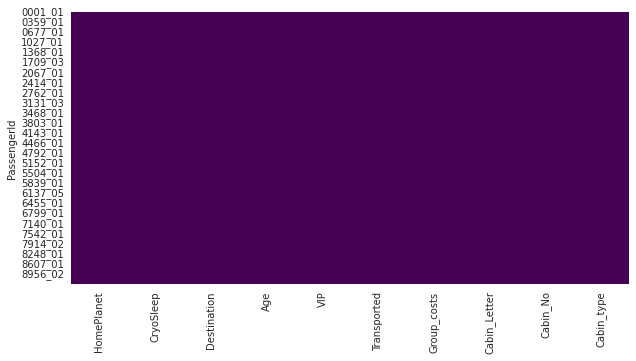

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(cleaned_data.isna(), cmap = 'viridis', cbar = False)
plt.show()

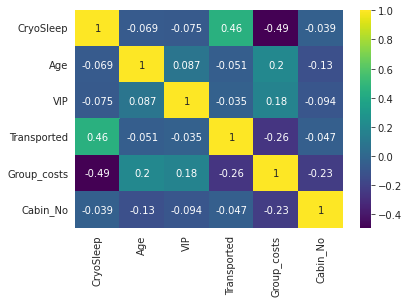

In [ ]:
sns.heatmap(cleaned_data.corr(),cmap = 'viridis',annot = cleaned_data.corr())

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   Transported   8693 non-null   bool   
 6   Group_costs   8693 non-null   float64
 7   Cabin_Letter  8693 non-null   object 
 8   Cabin_No      8693 non-null   float64
 9   Cabin_type    8693 non-null   object 
dtypes: bool(3), float64(3), object(4)
memory usage: 826.8+ KB


##Исследуем признаки c тратами

In [ ]:
new_data = cleaned_data

In [ ]:
new_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Group_costs,Cabin_Letter,Cabin_No,Cabin_type,Total costs
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,1.0,B,0.0,P,0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,2.0,F,0.0,S,0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,8.0,A,0.0,S,0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5.0,A,0.0,S,0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,2.0,F,1.0,S,0


In [ ]:
new_data.describe(percentiles=[0.5,0.6,0.7,0.8,0.9,1.0])

,Age,Group_costs,Cabin_No
count,8693.000000,8693.000000,8693.000000
mean,29.418218,2.118371,598.691361
std,13.720105,1.656028,511.749587
min,1.000000,1.000000,0.000000
50%,28.000000,1.000000,425.000000
60%,30.000000,2.000000,607.000000
70%,35.000000,2.000000,872.000000
80%,40.000000,3.000000,1123.600000
90%,49.000000,4.800000,1402.000000
100%,79.000000,9.000000,1894.000000


In [ ]:
column_list_with_cost = ['RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']

In [ ]:
#сделаем колонку с тратами и просуммируем в нее все траты
new_data['Total costs'] = 0
for i in column_list_with_cost:
  new_data['Total costs'] = new_data['Total costs'] + new_data[i]

KeyError: ignored

In [ ]:
new_data.drop(column_list_with_cost,axis = 1, inplace = True) #удалим колонки с тратами

In [ ]:
sns.lmplot(data = new_data, x = 'Total costs', y = 'Age', aspect = 3, height = 5)

In [ ]:
plt.figure(figsize = (30,5))
sns.boxplot(new_data['Total costs'])
plt.show()

In [ ]:
new_data.describe(percentiles=[0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [ ]:
sns.heatmap(new_data.corr(),cmap = 'viridis',annot = new_data.corr())

In [ ]:
costs_bins = new_data['Total costs'].quantile([0,0.5,0.75,0.85,0.9,0.95,0.96,0.98,0.99,1]) #делим траты на категории
costs_bins

In [ ]:
new_data['Group_costs'] = pd.cut(new_data['Total costs'], costs_bins,
                             labels = ['1','2','3','4','5','6','7','8','9'],right = False, include_lowest=True)
#new_data = new_data.drop('Total costs', axis = 1)

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(data = new_data, y = 'Total costs', x = 'Group_costs', hue = 'Group_costs')
plt.show()

In [ ]:
new_data.head()

In [ ]:
new_data['Cabin_No'] = new_data['Cabin_No'].astype('float64')
sns.heatmap(new_data.corr(),cmap = 'viridis',annot = new_data.corr())

## Исследуем признак Cabin



In [ ]:
cabin_df = new_data['Cabin'].str.split('/', expand = True)

In [ ]:
cabin_df.head()

,0,1,2
PassengerId,,,
0001_01,B,0,P
0002_01,F,0,S
0003_01,A,0,S
0003_02,A,0,S
0004_01,F,1,S


In [ ]:
cabin_df.columns = ['Cabin_Letter', 'Cabin_No', 'Cabin_type']

In [ ]:
cabin_df.describe()

,Cabin_Letter,Cabin_No,Cabin_type
count,8494,8494,8494
unique,8,1817,2
top,F,82,S
freq,2794,28,4288


In [ ]:
new_data = pd.concat([new_data,cabin_df], axis = 1) #соединим 2 таблицы
new_data.drop('Cabin',axis = 1,inplace = True) #удаляем колонку Cabin

In [ ]:
new_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Total costs,Group_costs,Cabin_Letter,Cabin_No,Cabin_type
PassengerId,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,1,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,2,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,7,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,5,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,2,F,1,S


In [ ]:
new_data['Cabin_No'] = new_data['Cabin_No'].astype('float64')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   object  
 1   CryoSleep     8476 non-null   object  
 2   Destination   8511 non-null   object  
 3   Age           8514 non-null   float64 
 4   VIP           8490 non-null   object  
 5   Name          8493 non-null   object  
 6   Transported   8693 non-null   bool    
 7   Total costs   7785 non-null   float64 
 8   Group_costs   7784 non-null   category
 9   Cabin_Letter  8494 non-null   object  
 10  Cabin_No      8494 non-null   float64 
 11  Cabin_type    8494 non-null   object  
dtypes: bool(1), category(1), float64(3), object(7)
memory usage: 1022.4+ KB


In [ ]:
new_data['Cabin_Letter'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_Letter, dtype: int64

In [ ]:
new_data['Cabin_type'].value_counts()

S    3905
P    3831
Name: Cabin_type, dtype: int64

In [ ]:
new_data['Destination'].value_counts()

TRAPPIST-1e      5372
55 Cancri e      1639
PSO J318.5-22     725
Name: Destination, dtype: int64

In [ ]:
new_data['HomePlanet'].value_counts()

Earth     4197
Europa    1936
Mars      1603
Name: HomePlanet, dtype: int64

In [ ]:
new_data['CryoSleep'].value_counts()

False    4974
True     2762
Name: CryoSleep, dtype: int64

In [ ]:
new_data['VIP'].value_counts()

False    7553
True      183
Name: VIP, dtype: int64

In [ ]:
new_data['Transported'].value_counts()

True     3893
False    3843
Name: Transported, dtype: int64

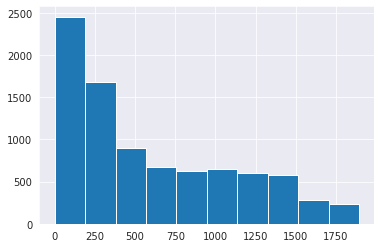

In [ ]:
new_data['Cabin_No'].hist()

##Кодируем признаки

In [ ]:
def get_transform(df):
  #создаем список колонок на удаление
  cols_to_drop = list()
  #кодирование label encoder признаков
  df['HomePlanet_code'] = df['HomePlanet'].map({'Earth' : 0,
                                                'Europa' : 1,
                                                'Mars': 2})
  df['CryoSleep_code'] = df['CryoSleep'].map({False: 0,
                                              True : 1})
  df['Destination_code'] = df['Destination'].map({'TRAPPIST-1e': 0,
                                                  '55 Cancri e': 1,
                                                  'PSO J318.5-22': 2})
  df['VIP_code'] = df['VIP'].map({False: 0,
                                  True : 1})
  df['Cabin_type_code'] = df['Cabin_type'].map({'S':0,
                                           'P':1
                                           })
  #кодирование label encoder целевой переменной
  df['Transported_target'] = df['Transported'].map({False : 0,
                                                    True : 1}) 

  #добавляем колонки на удаление
  cols_to_drop.append('HomePlanet')
  cols_to_drop.append('CryoSleep')
  cols_to_drop.append('Destination')
  cols_to_drop.append('VIP')
  cols_to_drop.append('Transported')
  cols_to_drop.append('Cabin_type')
  #кодирование ohe
  cabin_dummies = pd.get_dummies(df['Cabin_Letter'], prefix = 'Cabin_Letter_OHE')
  df = pd.concat([df, cabin_dummies], axis = 1)
  #добавляем колонки на удаление
  cols_to_drop.append('Cabin_Letter')
  #удалим колонки
  df_result = df.drop(cols_to_drop, axis = 1)
  #вернем датасет с закодированными признаками

  return df_result

In [ ]:
dataset = get_transform(cleaned_data)
dataset.head()

,Age,Group_costs,Cabin_No,Total costs,HomePlanet_code,CryoSleep_code,Destination_code,VIP_code,Cabin_type_code,Transported_target,Cabin_Letter_OHE_A,Cabin_Letter_OHE_B,Cabin_Letter_OHE_C,Cabin_Letter_OHE_D,Cabin_Letter_OHE_E,Cabin_Letter_OHE_F,Cabin_Letter_OHE_G,Cabin_Letter_OHE_T
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,39.0,1.0,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
0002_01,24.0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
0003_01,58.0,8.0,0.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
0003_02,33.0,5.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0004_01,16.0,2.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8693 non-null   float64
 1   Group_costs         8693 non-null   float64
 2   Cabin_No            8693 non-null   float64
 3   Total costs         8693 non-null   int64  
 4   HomePlanet_code     8693 non-null   int64  
 5   CryoSleep_code      8693 non-null   int64  
 6   Destination_code    8693 non-null   int64  
 7   VIP_code            8693 non-null   int64  
 8   Cabin_type_code     8693 non-null   int64  
 9   Transported_target  8693 non-null   int64  
 10  Cabin_Letter_OHE_A  8693 non-null   uint8  
 11  Cabin_Letter_OHE_B  8693 non-null   uint8  
 12  Cabin_Letter_OHE_C  8693 non-null   uint8  
 13  Cabin_Letter_OHE_D  8693 non-null   uint8  
 14  Cabin_Letter_OHE_E  8693 non-null   uint8  
 15  Cabin_Letter_OHE_F  8693 non-null   uint8  
 16  Ca

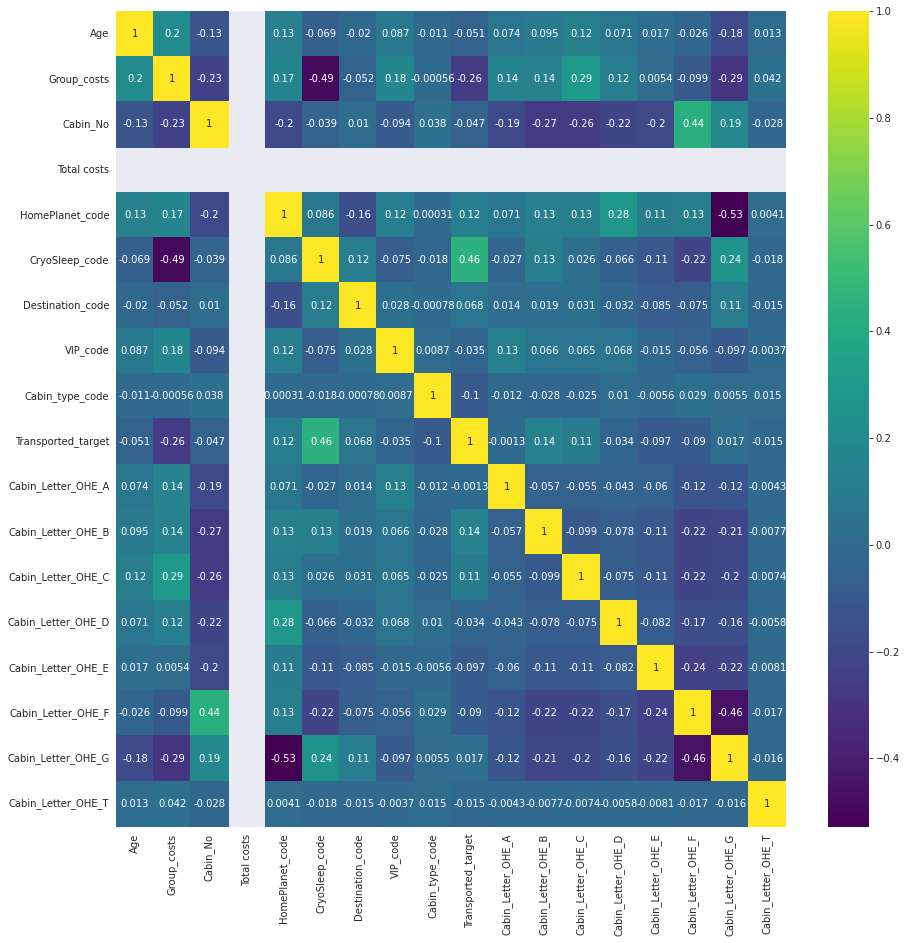

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),cmap = 'viridis',annot =dataset.corr())
plt.show()

#Подготовка выборки для обучения (preprocessing)

In [ ]:
#определим X и y
y = np.array(dataset['Transported_target'])
X = np.array(dataset.drop('Transported_target', axis = 1))

In [ ]:
y[:2]

array([0, 1])

In [ ]:
X[1]

array([24.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.])

In [ ]:
#StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[1]

array([-0.39493357, -0.07077297, -1.16995854, -0.83187091, -0.74654345,
       -0.61077664, -0.15501967, -0.99323581, -0.177666  , -0.319021  ,
       -0.31041126, -0.24308166, -0.33920349,  1.43296529, -0.65790072,
       -0.02398972])

#Разделяем на train & test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6954, 17)
(6954,)
(1739, 17)
(1739,)


#ML

##kNN

In [ ]:
#инициализация алгоритма
kNN = KNeighborsClassifier(n_neighbors= 7)

#подбор гиперпараметров методом сетки
#задаем параметры сетки
param_grid = {'n_neighbors' : [2,3,4,5,10,15],
              'metric' : ['cosine', 'euclidean', 'manhattan']}
#инициализация сетки
kNN_grid = GridSearchCV(kNN,
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        cv = 5)
#fit grid
kNN_grid.fit(X_train, y_train)
print(f'Лучшая точность {kNN_grid.best_score_}',
      f'Лучшие параметры {kNN_grid.best_params_}')

Лучшая точность 0.7424525598787686 Лучшие параметры {'metric': 'cosine', 'n_neighbors': 15}


In [ ]:
#обучение алгоритма
kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#прогноз
predict = kNN.predict([X_test[10]])
print('Пассажир скорее всего ', predict)

Клиент скорее всего  [0]


##bayes

In [ ]:
#gaussian NB
gaussNB = GaussianNB()

#подбор гиперпараметров grid search
#задаем параметры сетки
param_grid = {'var_smoothing' : [1e-09,1e-10,1e-12]}
#инициализация сетки
gaussNB_grid = GridSearchCV(gaussNB,
                       param_grid = param_grid,
                       scoring = 'f1',
                       cv = 5)
#обучение сетки
gaussNB_grid.fit(X_train, y_train)
#смотрим лучшую точность
print(f'Лучшая точность {gaussNB_grid.best_score_}',
      f'Лучшие параметры {gaussNB_grid.best_params_}')

Лучшая точность 0.696032884239937 Лучшие параметры {'var_smoothing': 1e-09}


In [ ]:
#bernulli NB
bernoulliNB = BernoulliNB()

#подбор гиперпараметров grid search
#задаем параметры сетки
param_grid = {'alpha' : [0.001, 0.01, 0.1, 0.2],
              'binarize': [0.0,0.2,0.3],
              'fit_prior' : [True, False]}
#инициализация сетки
bernoulliNB_grid = GridSearchCV(bernoulliNB,
                       param_grid = param_grid,
                       scoring = 'f1',
                       cv = 5)
#обучение сетки
bernoulliNB_grid.fit(X_train, y_train)
#смотрим лучшую точность
print(f'Лучшая точность {bernoulliNB_grid.best_score_}',
      f'Лучшие параметры {bernoulliNB_grid.best_params_}')

Лучшая точность 0.6891716149813956 Лучшие параметры {'alpha': 0.001, 'binarize': 0.3, 'fit_prior': False}


In [ ]:
#multinominal NB
multinomialNB = MultinomialNB()
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X, y,
                                                                test_size = 0.2,
                                                                shuffle = True,
                                                                random_state=42)

#подбор гиперпараметров grid search
#задаем параметры сетки
param_grid = {'alpha' : [0.001, 0.01, 0.1, 0.2],
              'fit_prior' : ['True', 'False']}
#инициализация сетки
MultinomialNB_grid = GridSearchCV(multinomialNB,
                       param_grid = param_grid,
                       scoring = 'f1',
                       cv = 5)
#обучение сетки
MultinomialNB_grid.fit(X_train_mn, y_train_mn)
#смотрим лучшую точность
print(f'Лучшая точность {MultinomialNB_grid.best_score_}',
      f'Лучшие параметры {MultinomialNB_grid.best_params_}')

Лучшая точность 0.6143550634696658 Лучшие параметры {'alpha': 0.001, 'fit_prior': 'True'}


##DT (Decision Tree)

In [ ]:
#DT
dt = DecisionTreeClassifier()

#параметры сетки
param_grid = {'criterion' : ['entropy', 'gini', 'log_loss'],
              'splitter': ['random', 'best'],
              'max_depth' : [2, 4, 5, 6, 9],
              'min_samples_split': [2,3,4,5,6]}
#инициализация сетки
dt_grid = GridSearchCV(dt, 
                       param_grid = param_grid,
                       scoring = 'f1',
                       cv = 5)
#обучение сетки
dt_grid.fit(X_train, y_train)

#оптимальные параметры
print(f'Лучшая точность {dt_grid.best_score_}',
      f'Лучшие параметры {dt_grid.best_params_}')

Лучшая точность 0.7155616830358321 Лучшие параметры {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 5, 'splitter': 'best'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

In [ ]:
#DT
dt = DecisionTreeClassifier()

#параметры сетки
param_grid = {'max_features': ['auto','sqrt','log2'],
              'ccp_alpha':[0.1,0.01,0.001],
              'criterion' : ['entropy', 'gini'],
              'max_depth' : [2, 4, 5, 6, 9]}
#инициализация сетки
dt_grid = GridSearchCV(dt, 
                       param_grid = param_grid,
                       cv = 5,verbose = True)
#обучение сетки
dt_grid.fit(X_train, y_train)

#оптимальные параметры
print(f'Лучшая точность {dt_grid.best_score_}',
      f'Лучшие параметры {dt_grid.best_params_}')
best_dec_tree = dt_grid.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Лучшая точность 0.7325300880790694 Лучшие параметры {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}


In [ ]:
score = accuracy_score(y_test,best_dec_tree.predict(X_test))
print('accuracy: ',score)

accuracy:  0.7331799884991375


In [ ]:
dataset.drop('Transported_target', axis = 1).columns

Index(['Age', 'Group_costs', 'Cabin_No', 'Total costs', 'HomePlanet_code',
       'CryoSleep_code', 'Destination_code', 'VIP_code', 'Cabin_type_code',
       'Cabin_Letter_OHE_A', 'Cabin_Letter_OHE_B', 'Cabin_Letter_OHE_C',
       'Cabin_Letter_OHE_D', 'Cabin_Letter_OHE_E', 'Cabin_Letter_OHE_F',
       'Cabin_Letter_OHE_G', 'Cabin_Letter_OHE_T'],
      dtype='object')

[Text(0.6221264367816092, 0.95, 'Cabin_Letter_OHE_C <= 1.456\nentropy = 1.0\nsamples = 6954\nvalue = [3454, 3500]'),
 Text(0.3936781609195402, 0.85, 'CryoSleep_code <= 0.296\nentropy = 0.999\nsamples = 6343\nvalue = [3261, 3082]'),
 Text(0.15517241379310345, 0.75, 'Age <= -1.233\nentropy = 0.905\nsamples = 4120\nvalue = [2800, 1320]'),
 Text(0.06896551724137931, 0.65, 'Cabin_Letter_OHE_E <= 1.304\nentropy = 0.964\nsamples = 244\nvalue = [95, 149]'),
 Text(0.04597701149425287, 0.55, 'HomePlanet_code <= -0.205\nentropy = 0.972\nsamples = 231\nvalue = [93, 138]'),
 Text(0.022988505747126436, 0.45, 'entropy = 0.999\nsamples = 179\nvalue = [92, 87]'),
 Text(0.06896551724137931, 0.45, 'entropy = 0.137\nsamples = 52\nvalue = [1, 51]'),
 Text(0.09195402298850575, 0.55, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.2413793103448276, 0.65, 'Group_costs <= -0.373\nentropy = 0.884\nsamples = 3876\nvalue = [2705, 1171]'),
 Text(0.16091954022988506, 0.55, 'Cabin_Letter_OHE_F <= 0.368\ne

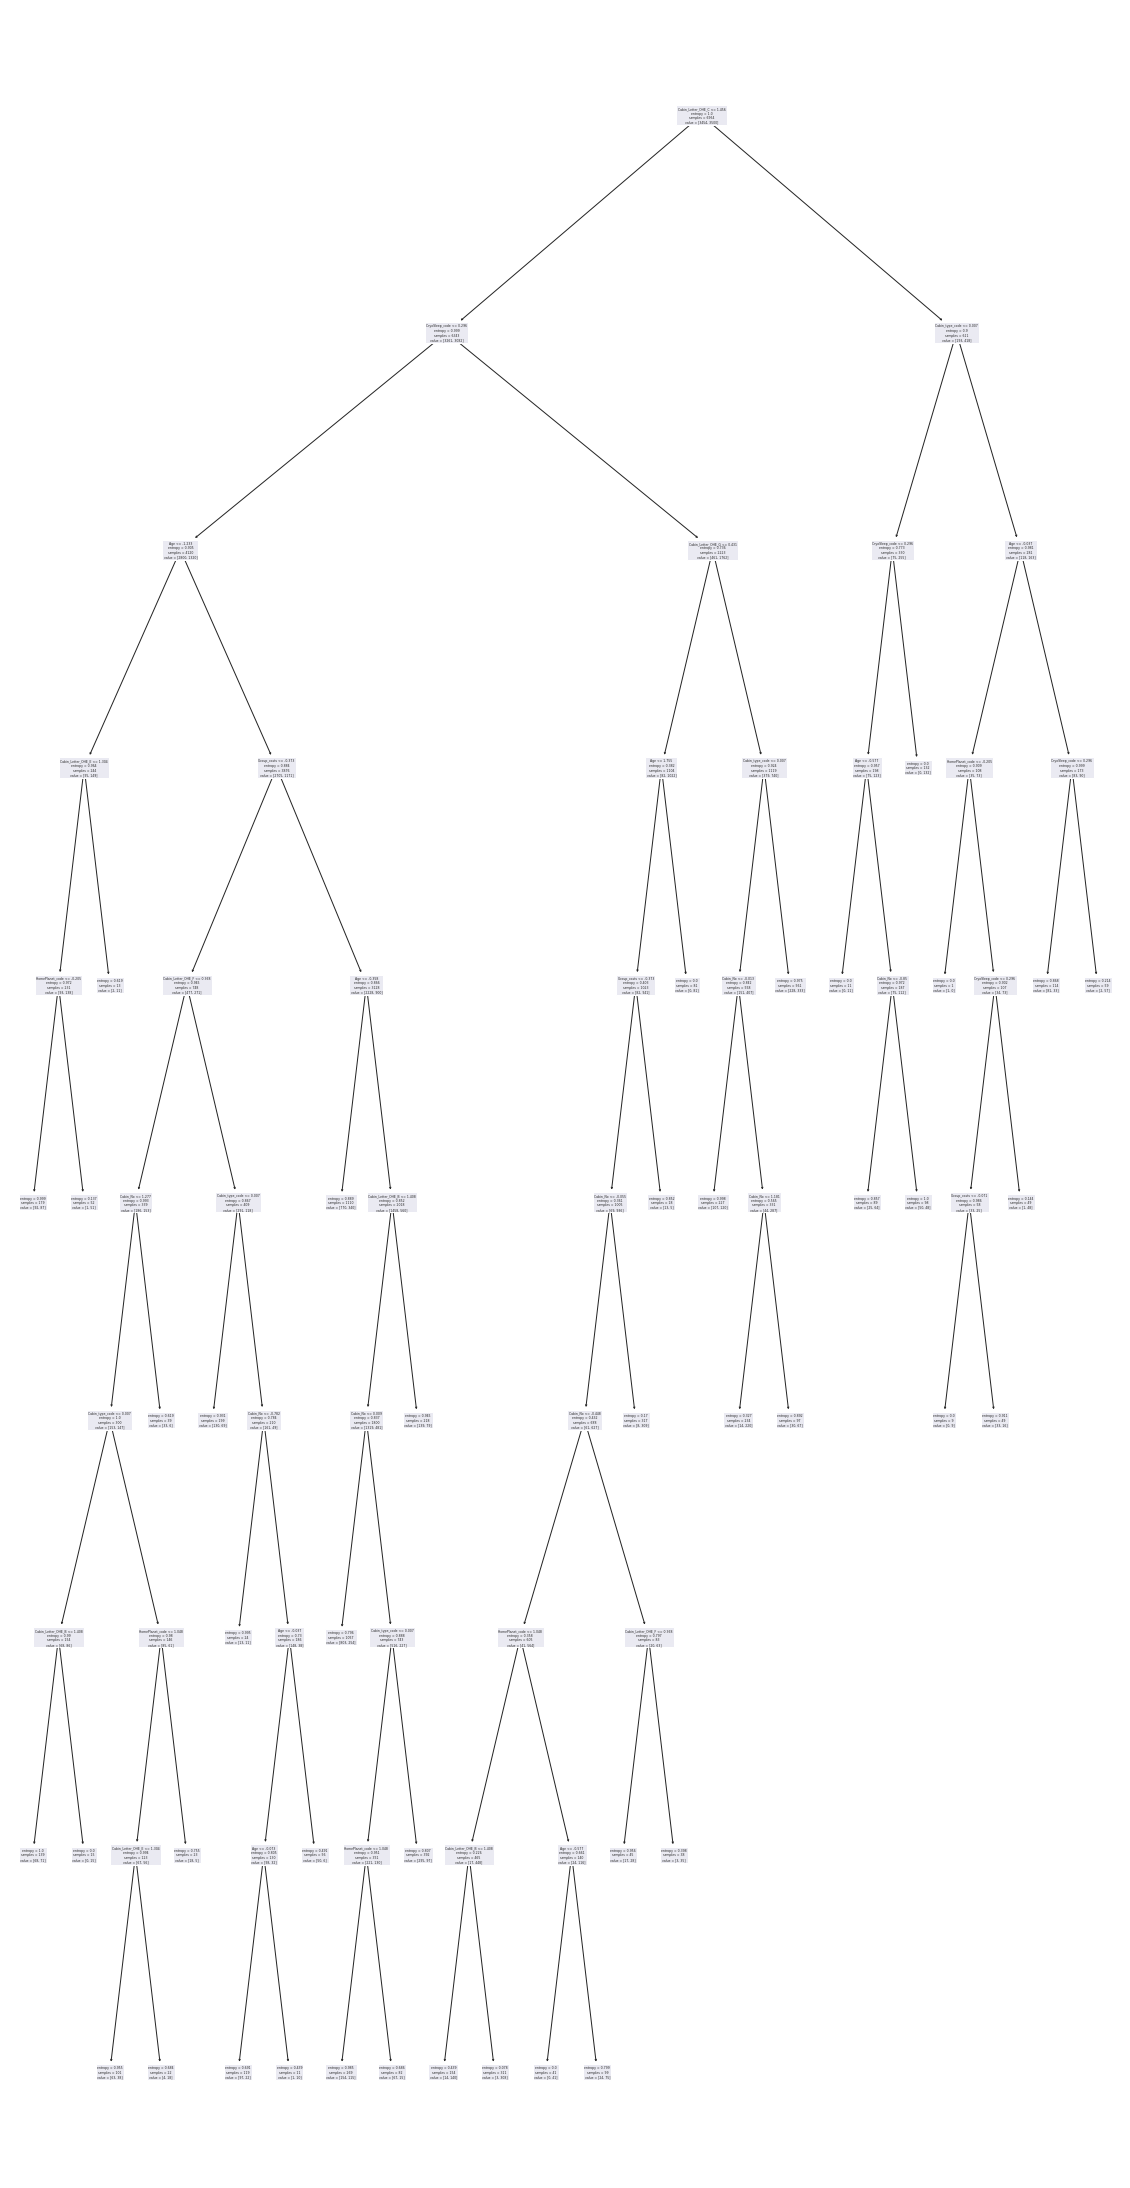

In [ ]:
from sklearn import tree
plt.figure(figsize = (20,40))
ds_cols = dataset.drop('Transported_target', axis = 1).columns
tree.plot_tree(best_dec_tree,feature_names = ds_cols)

##SVM (метод опорных векторов)

In [ ]:
#SVM
svm_clf = SVC()

#Параметры сетки
param_grid = {'kernel' : ['linear', 'poly', 'sigmoid'],
              'degree' : [2, 4, 10],
              'C' : [1,2,3]}

#инициализация сетки
svm_grid = GridSearchCV(svm_clf, 
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        cv =5)
#Обучение сетки
svm_grid.fit(X_train, y_train)
#оптимальные параметры
print(f'Лучшая точность {svm_grid.best_score_}',
      f'Лучшие параметры {svm_grid.best_params_}')

Лучшая точность 0.735408406560158 Лучшие параметры {'C': 3, 'degree': 4, 'kernel': 'poly'}


##Logistic Regression

In [ ]:
logr = LogisticRegression()

#Параметры сетки
param_grid = {'penalty' : ['l2'],
              'C' : [1,1.1,0.9]}

#инициализация сетки
logr_grid = GridSearchCV(logr, 
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        cv = 5)
#Обучение сетки
logr_grid.fit(X_train, y_train)
#оптимальные параметры
print(f'Лучшая точность {logr_grid.best_score_}',
      f'Лучшие параметры {logr_grid.best_params_}')

Лучшая точность 0.7292241490775747 Лучшие параметры {'C': 1, 'penalty': 'l2'}


##Random Forest

In [ ]:
rf = RandomForestClassifier()

#Параметры сетки
param_grid = {'n_estimators' : [2, 4, 6, 8, 10,20],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 4, 6, 7],
              'min_samples_split' : [2,3,4,5]}

#инициализация сетки
rf_grid = GridSearchCV(rf, 
                       param_grid = param_grid,
                       scoring = 'accuracy',
                       cv = 5)
#Обучение сетки
rf_grid.fit(X_train, y_train)
#оптимальные параметры
print(f'Лучшая точность {rf_grid.best_score_}',
      f'Лучшие параметры {rf_grid.best_params_}')

Лучшая точность 0.7479180135402822 Лучшие параметры {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 20}


##Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()

#параметры сетки
param_grid = {'n_estimators':[2,3,4,5,6],
              'max_depth': [3,5,7,9],
              'learning_rate':[0.1, 0.5, 0.01]}
#инциализация сетки
gbc_grid = GridSearchCV(gbc,
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
gbc_grid.fit(X_train,y_train)
#лучшие параметры
print(f'Лучшая точность {gbc_grid.best_score_}',
      f'Лучшие параметры {gbc_grid.best_params_}')

Лучшая точность 0.7497878964980423 Лучшие параметры {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 5}


##XGBC Classifier

In [ ]:
xgbc = XGBClassifier()

#параметры сетки
param_grid = {'n_estimators':[2,4,6,8,10],
              'max_depth': [2,3,4,5,6],
              'learning_rate':[0.1, 0.01, 0.05]}
#инциализация сетки
xgbc_grid = GridSearchCV(xgbc,
                        param_grid = param_grid,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
xgbc_grid.fit(X_train,y_train)
#лучшие параметры
print(f'Лучшая точность {xgbc_grid.best_score_}',
      f'Лучшие параметры {xgbc_grid.best_params_}')

Лучшая точность 0.7402955277761973 Лучшие параметры {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 10}


#Снимаем метрики

In [ ]:
#функция которая считает метрики и возвращает их значения
from sklearn.metrics._plot.roc_curve import auc

def get_metrics(y_test, y_pred):
  print('Accuracy = ', accuracy_score(y_test, y_pred))
  print('Precision = ', precision_score(y_test, y_pred))
  print('recall = ', recall_score(y_test, y_pred))
  print('f1 = ', f1_score(y_test, y_pred))
  print('ROC AUC = ', roc_auc_score(y_test, y_pred))
  print('confusion matrix  : = ', '\n', confusion_matrix(y_test, y_pred))

  #FPR, TPR (false positive rate, true positive rate)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  #строим график roc кривой
  roc_auc = auc(fpr, tpr)

  #отрисовка

  plt.title('roc_auc')
  plt.plot(fpr,tpr)
  plt.plot([0,1], [0,1], 'r--')
  plt.legend

  plt.xlabel('TPR')
  plt.ylabel('FPR')
  plt.show()

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'metric': ['cosine', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 10, 15]},
             scoring='accuracy')

Accuracy =  0.7429557216791259
Precision =  0.796423658872077
recall =  0.6594533029612756
f1 =  0.7214953271028037
ROC AUC =  0.7437800777291861
confusion matrix  : =  
 [[713 148]
 [299 579]]


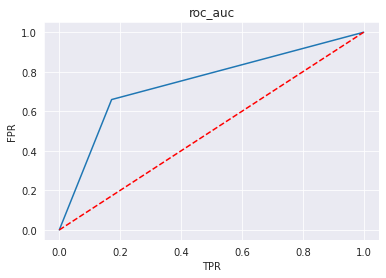

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-12]}, scoring='f1')

Accuracy =  0.7027027027027027
Precision =  0.7021276595744681
recall =  0.714123006833713
f1 =  0.7080745341614906
ROC AUC =  0.7025899587014094
confusion matrix  : =  
 [[595 266]
 [251 627]]


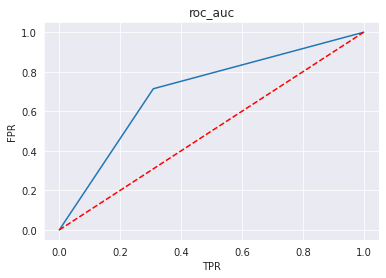

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2],
                         'binarize': [0.0, 0.2, 0.3],
                         'fit_prior': [True, False]},
             scoring='f1')

Accuracy =  0.726279470960322
Precision =  0.7823033707865169
recall =  0.6343963553530751
f1 =  0.7006289308176101
ROC AUC =  0.7271865632746793
confusion matrix  : =  
 [[706 155]
 [321 557]]


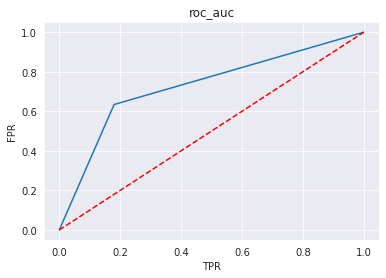

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [2, 4, 5, 6, 9],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']},
             scoring='f1')

Accuracy =  0.7360552041403106
Precision =  0.7731421121251629
recall =  0.6753986332574032
f1 =  0.7209726443768996
ROC AUC =  0.7366540204614542
confusion matrix  : =  
 [[687 174]
 [285 593]]


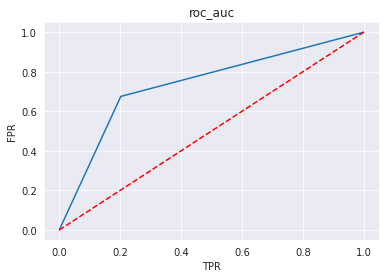

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'degree': [2, 4, 10],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             scoring='accuracy')

Accuracy =  0.7360552041403106
Precision =  0.7842605156037992
recall =  0.6583143507972665
f1 =  0.7157894736842105
ROC AUC =  0.7368226806251141
confusion matrix  : =  
 [[702 159]
 [300 578]]


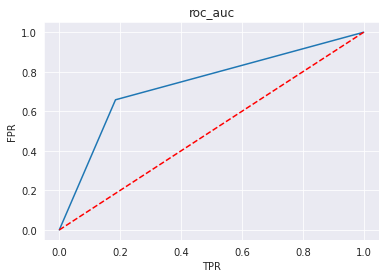

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 1.1, 0.9], 'penalty': ['l2']},
             scoring='accuracy')

Accuracy =  0.7257044278320874
Precision =  0.7727891156462585
recall =  0.6469248291571754
f1 =  0.7042777433353998
ROC AUC =  0.7264821590617468
confusion matrix  : =  
 [[694 167]
 [310 568]]


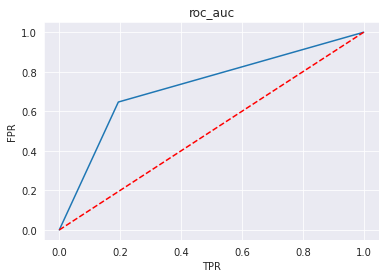

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 4, 6, 8, 10, 20]},
             scoring='accuracy')

Accuracy =  0.7400805060379528
Precision =  0.7886178861788617
recall =  0.662870159453303
f1 =  0.7202970297029704
ROC AUC =  0.7408427452318779
confusion matrix  : =  
 [[705 156]
 [296 582]]


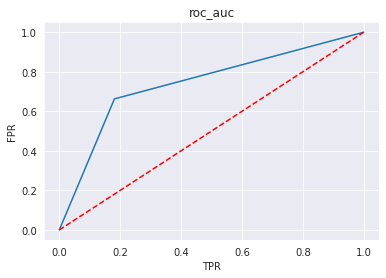

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 0.01],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [2, 3, 4, 5, 6]},
             scoring='accuracy')

Accuracy =  0.750431282346176
Precision =  0.8016304347826086
recall =  0.6719817767653758
f1 =  0.7311028500619577
ROC AUC =  0.7512057548170665
confusion matrix  : =  
 [[715 146]
 [288 590]]


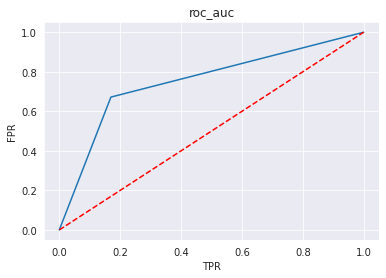

Метрики для алгоритма :  GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [2, 4, 6, 8, 10]},
             scoring='accuracy')

Accuracy =  0.7435307648073606
Precision =  0.8085714285714286
recall =  0.6446469248291572
f1 =  0.7173637515842839
ROC AUC =  0.7445069699639397
confusion matrix  : =  
 [[727 134]
 [312 566]]


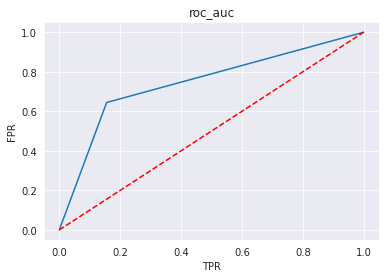

In [ ]:
algo_list = [kNN_grid, gaussNB_grid, bernoulliNB_grid,dt_grid,svm_grid, logr_grid, rf_grid,gbc_grid, xgbc_grid]

for i in algo_list:
  y_pred = i.predict(X_test)
  print('================')
  print('Метрики для алгоритма : ', i)
  print('================', '\n')
  get_metrics(y_test, y_pred)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
xgbc_grid.best_score_

0.7402955277761973

#Выбираем лучшую модель

In [ ]:
#выбираем лучшую модель и записываем ее в переменную
model = xgbc_grid.best_estimator_
joblib.dump(model, "model.pkl")

['model.pkl']

#Работаем с тестовой базой

In [ ]:
path_test = '/content/drive/MyDrive/!МГТУ им. Баумана/kaggle/spaceship titanic/test.csv'

In [ ]:
test_data = pd.read_csv(path_test, index_col = 0)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_dataset = clean_data(test_data)

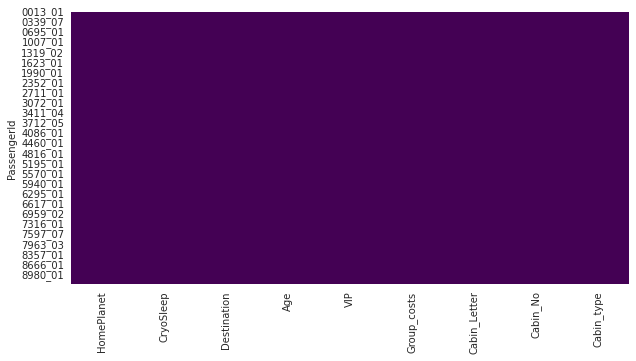

In [ ]:
#смотрим что датасет чистый
plt.figure(figsize = (10,5))
sns.heatmap(test_dataset.isna(), cmap = 'viridis', cbar = False)
plt.show()

In [ ]:
test_dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Group_costs,Cabin_Letter,Cabin_No,Cabin_type
PassengerId,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,1.0,G,3.0,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,4.0,F,4.0,S
0019_01,Europa,True,55 Cancri e,31.0,False,1.0,C,0.0,S
0021_01,Europa,False,TRAPPIST-1e,38.0,False,7.0,C,1.0,S
0023_01,Earth,False,TRAPPIST-1e,20.0,False,1.0,F,5.0,S


In [ ]:
def get_transform(df):
  #создаем список колонок на удаление
  cols_to_drop = list()
  #кодирование label encoder признаков
  df['HomePlanet_code'] = df['HomePlanet'].map({'Earth' : 0,
                                                'Europa' : 1,
                                                'Mars': 2})
  df['CryoSleep_code'] = df['CryoSleep'].map({False: 0,
                                              True : 1})
  df['Destination_code'] = df['Destination'].map({'TRAPPIST-1e': 0,
                                                  '55 Cancri e': 1,
                                                  'PSO J318.5-22': 2})
  df['VIP_code'] = df['VIP'].map({False: 0,
                                  True : 1})
  df['Cabin_type_code'] = df['Cabin_type'].map({'S':0,
                                           'P':1})
  #добавляем колонки на удаление
  cols_to_drop.append('HomePlanet')
  cols_to_drop.append('CryoSleep')
  cols_to_drop.append('Destination')
  cols_to_drop.append('VIP')
  cols_to_drop.append('Cabin_type')
  #кодирование ohe
  cabin_dummies = pd.get_dummies(df['Cabin_Letter'], prefix = 'Cabin_Letter_OHE')
  df = pd.concat([df, cabin_dummies], axis = 1)
  #добавляем колонки на удаление
  cols_to_drop.append('Cabin_Letter')
  #удалим колонки
  df_result = df.drop(cols_to_drop, axis = 1)
  #вернем датасет с закодированными признаками

  return df_result

In [ ]:
test_dataset_tr = get_transform(test_dataset)

In [ ]:
test_dataset_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4277 non-null   float64
 1   Group_costs         4277 non-null   float64
 2   Cabin_No            4277 non-null   float64
 3   HomePlanet_code     4277 non-null   int64  
 4   CryoSleep_code      4277 non-null   int64  
 5   Destination_code    4277 non-null   int64  
 6   VIP_code            4277 non-null   int64  
 7   Cabin_type_code     4277 non-null   int64  
 8   Cabin_Letter_OHE_A  4277 non-null   uint8  
 9   Cabin_Letter_OHE_B  4277 non-null   uint8  
 10  Cabin_Letter_OHE_C  4277 non-null   uint8  
 11  Cabin_Letter_OHE_D  4277 non-null   uint8  
 12  Cabin_Letter_OHE_E  4277 non-null   uint8  
 13  Cabin_Letter_OHE_F  4277 non-null   uint8  
 14  Cabin_Letter_OHE_G  4277 non-null   uint8  
 15  Cabin_Letter_OHE_T  4277 non-null   uint8  
dtypes:

In [ ]:
x_test = np.array(test_dataset_tr)

In [ ]:
x_test[:1]

array([[27.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.]])

In [ ]:
x_test.shape

(4277, 16)

In [ ]:
#StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_test)

In [ ]:
X_scaled[:1]

array([[-0.16423698, -0.675117  , -1.18100229, -0.83708445,  1.30650757,
        -0.59377362, -0.13268938, -0.99556746, -0.15393358, -0.3077366 ,
        -0.30591209, -0.24863081, -0.34460833, -0.72854667,  1.55614909,
        -0.03748097]])

#Результаты обучения

In [ ]:
#выбираем алгоритм машинного обучения SVM и смотрим результат предсказания
classifier = joblib.load("model.pkl")

In [ ]:
result = classifier.predict(X_scaled)

In [ ]:
test_dataset['Transported'] = result

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        4277 non-null   object 
 1   CryoSleep         4277 non-null   bool   
 2   Destination       4277 non-null   object 
 3   Age               4277 non-null   float64
 4   VIP               4277 non-null   bool   
 5   Group_costs       4277 non-null   float64
 6   Cabin_Letter      4277 non-null   object 
 7   Cabin_No          4277 non-null   float64
 8   Cabin_type        4277 non-null   object 
 9   HomePlanet_code   4277 non-null   int64  
 10  CryoSleep_code    4277 non-null   int64  
 11  Destination_code  4277 non-null   int64  
 12  VIP_code          4277 non-null   int64  
 13  Cabin_type_code   4277 non-null   int64  
 14  Transported       4277 non-null   int64  
dtypes: bool(2), float64(3), int64(6), object(4)
memory usage: 476.2+ KB


In [ ]:
result_df = test_dataset.drop(test_dataset.columns[:14],axis = 1)

In [ ]:
result_df['Transported'].replace(0, False, inplace = True)
result_df['Transported'].replace(1, True, inplace = True)

In [ ]:
result_df.to_csv('/content/drive/MyDrive/!МГТУ им. Баумана/kaggle/spaceship titanic/result.csv')